In [51]:
import pandas as pd
import numpy as np

In [52]:
data=pd.read_csv('/content/Student_Scholarship_Prediction.csv')

In [53]:
data.head()

,Student_ID,Age,GPA,Hours_Studied_Per_Week,Extracurricular_Score,Volunteer_Hours,Parental_Education_Level,Family_Income,Distance_From_School,Scholarship_Status
0,1,23,3.55,32.0,6,133,Ph.D.,24926.0,11.2,0
1,2,20,3.12,36.0,4,3,Ph.D.,111299.0,8.4,1
2,3,21,2.85,34.0,9,107,Ph.D.,23969.0,10.6,0
3,4,23,3.81,36.0,8,114,Bachelor's,55733.0,19.9,0
4,5,19,2.22,2.0,10,28,Master's,89855.0,3.1,1


In [54]:
data.tail()

,Student_ID,Age,GPA,Hours_Studied_Per_Week,Extracurricular_Score,Volunteer_Hours,Parental_Education_Level,Family_Income,Distance_From_School,Scholarship_Status
915,591,17,NaN,NaN,3,21,Ph.D.,NaN,10.6,1
916,169,23,NaN,NaN,3,16,Master's,NaN,10.3,0
917,423,22,NaN,NaN,8,36,Master's,NaN,9.6,0
918,448,22,NaN,NaN,1,67,Master's,NaN,19.3,0
919,68,17,NaN,NaN,10,108,High School,NaN,15.1,1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                920 non-null    int64  
 1   Age                       920 non-null    int64  
 2   GPA                       855 non-null    float64
 3   Hours_Studied_Per_Week    859 non-null    float64
 4   Extracurricular_Score     920 non-null    int64  
 5   Volunteer_Hours           920 non-null    int64  
 6   Parental_Education_Level  920 non-null    object 
 7   Family_Income             855 non-null    float64
 8   Distance_From_School      920 non-null    float64
 9   Scholarship_Status        920 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 72.0+ KB


In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,920.0,448.392391,260.595972,1.00,221.75,448.00,674.250,900.0
Age,920.0,20.488043,2.329699,17.00,18.00,20.00,23.000,24.0
GPA,855.0,2.987123,0.588685,2.01,2.46,2.99,3.500,4.0
Hours_Studied_Per_Week,859.0,21.203725,13.925683,1.00,10.00,21.00,30.500,78.0
Extracurricular_Score,920.0,5.420652,2.839985,1.00,3.00,5.00,8.000,10.0
Volunteer_Hours,920.0,81.200000,51.845539,0.00,42.75,79.00,115.000,298.0
Family_Income,855.0,85111.639766,37650.711902,20320.00,51865.00,86677.00,118031.500,149900.0
Distance_From_School,920.0,10.232935,5.618281,0.50,5.50,9.90,15.125,20.0
Scholarship_Status,920.0,0.396739,0.489487,0.00,0.00,0.00,1.000,1.0


In [57]:
data.shape

(920, 10)

In [58]:
data.isnull().sum()

,0
Student_ID,0
Age,0
GPA,65
Hours_Studied_Per_Week,61
Extracurricular_Score,0
Volunteer_Hours,0
Parental_Education_Level,0
Family_Income,65
Distance_From_School,0
Scholarship_Status,0


In [59]:
data['GPA'].fillna(data['GPA'].mean(),inplace=True)
data['Hours_Studied_Per_Week'].fillna(data['Hours_Studied_Per_Week'].mean(),inplace=True)
data['Family_Income'].fillna(data['Family_Income'].mean(),inplace=True)

<ipython-input-59-139bd1733d12>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GPA'].fillna(data['GPA'].mean(),inplace=True)
<ipython-input-59-139bd1733d12>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [60]:
data.isnull().sum()

,0
Student_ID,0
Age,0
GPA,0
Hours_Studied_Per_Week,0
Extracurricular_Score,0
Volunteer_Hours,0
Parental_Education_Level,0
Family_Income,0
Distance_From_School,0
Scholarship_Status,0


In [61]:
data.duplicated().sum()

18

There are some duplicate records sitting in our dataset. let us remove them

In [62]:
data.drop_duplicates(inplace=True)

In [63]:
data.duplicated().sum()

0

In [64]:
num_features=data.select_dtypes(include=np.number).columns
cat_features=data.select_dtypes(exclude=np.number).columns

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

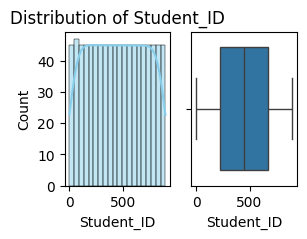

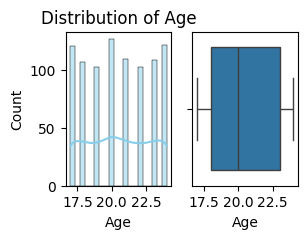

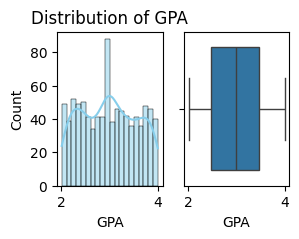

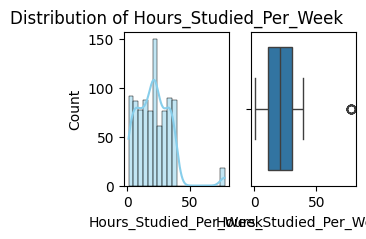

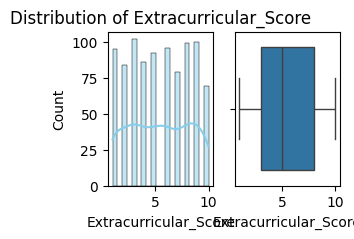

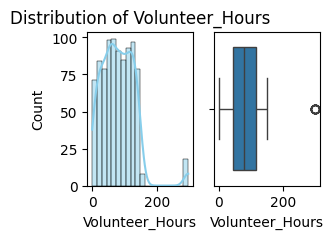

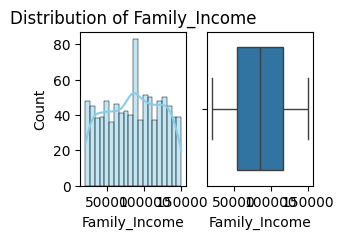

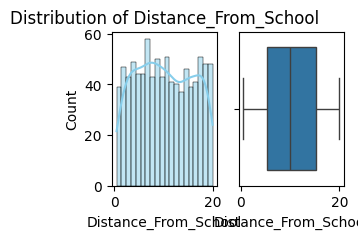

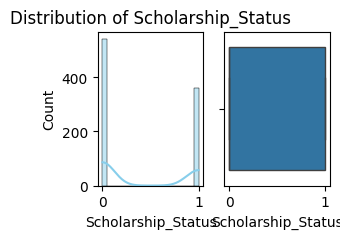

In [66]:
for feature in num_features:
  plt.figure(figsize=(3,2))
  plt.subplot(1,2,1)

  sns.histplot(data[feature],kde=True,bins=20,color='skyblue')
  plt.title(f'Distribution of {feature}')

  plt.subplot(1,2,2)
  sns.boxplot(x=data[feature])
  plt.show()

In [67]:
num_features

Index(['Student_ID', 'Age', 'GPA', 'Hours_Studied_Per_Week',
       'Extracurricular_Score', 'Volunteer_Hours', 'Family_Income',
       'Distance_From_School', 'Scholarship_Status'],
      dtype='object')

In [68]:
cat_features

Index(['Parental_Education_Level'], dtype='object')

In [69]:
data['Parental_Education_Level'].value_counts()

,count
Parental_Education_Level,
Master's,233
Ph.D.,230
High School,224
Bachelor's,215


<ipython-input-70-af0f7ad75f2e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Parental_Education_Level'].value_counts(),y=data['Parental_Education_Level'].value_counts().index,palette= 'coolwarm')


<Axes: xlabel='count', ylabel='Parental_Education_Level'>

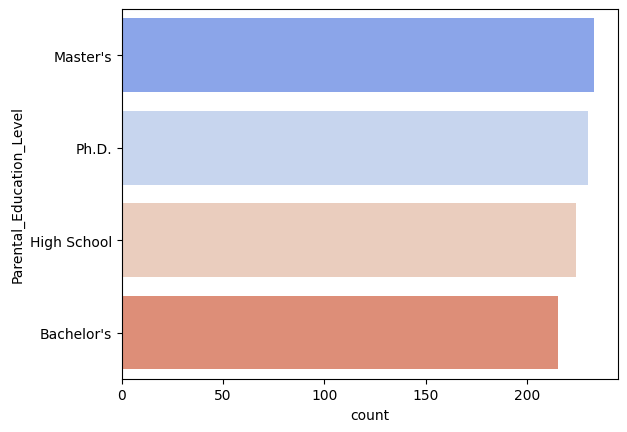

In [70]:
sns.barplot(x=data['Parental_Education_Level'].value_counts(),y=data['Parental_Education_Level'].value_counts().index,palette= 'coolwarm')

<Axes: xlabel='GPA', ylabel='Scholarship_Status'>

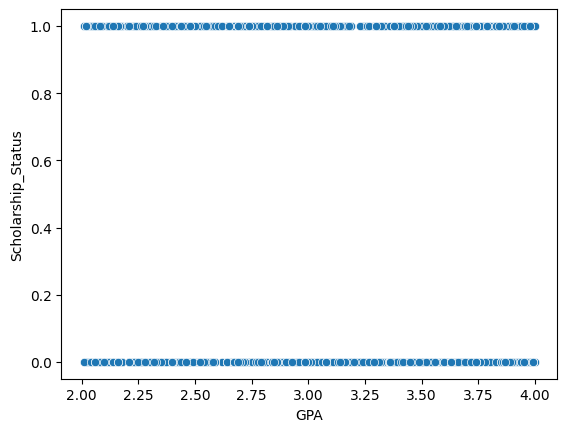

In [71]:
sns.scatterplot(x=data['GPA'],y=data['Scholarship_Status'])

<Axes: >

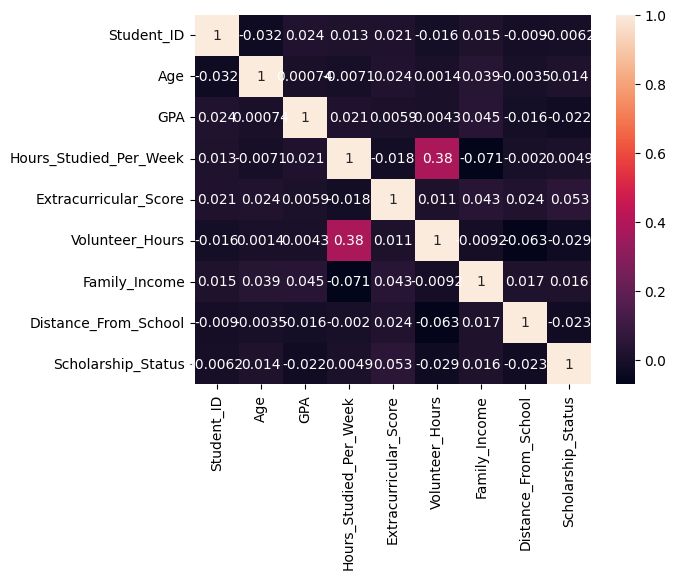

In [72]:
sns.heatmap(data[num_features].corr(),annot=True)

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [74]:
le=LabelEncoder()
data['Parental_Education_Level']=le.fit_transform(data['Parental_Education_Level'])

In [75]:
x=data.drop('Scholarship_Status',axis=1)
y=data['Scholarship_Status']

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [81]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [83]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [84]:
accuracy_score(y_test,y_pred)

0.6353591160220995

In [88]:
report=classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(report).T

,precision,recall,f1-score,support
0,0.649425,0.957627,0.773973,118.000000
1,0.285714,0.031746,0.057143,63.000000
accuracy,0.635359,0.635359,0.635359,0.635359
macro avg,0.467570,0.494687,0.415558,181.000000
weighted avg,0.522830,0.635359,0.524468,181.000000


In [89]:
confusion_matrix(y_test,y_pred)

array([[113,   5],
       [ 61,   2]])

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [92]:
y_prob = model.predict_proba(x_test)[:, 1]

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [94]:
roc_auc = auc(fpr, tpr)

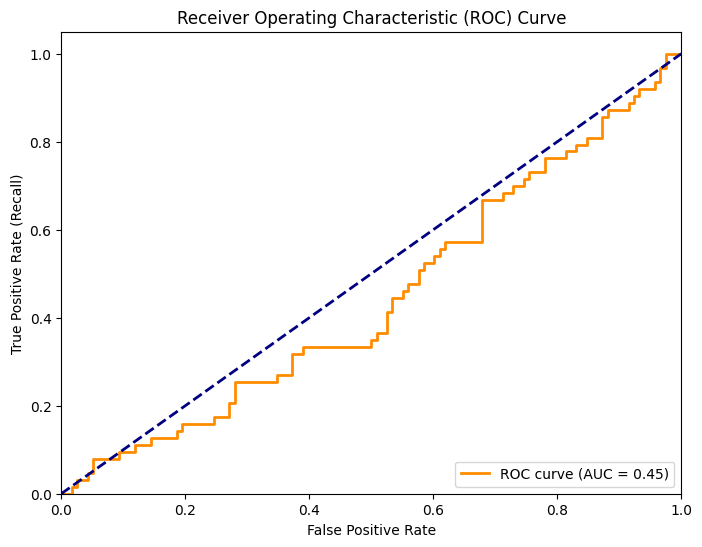

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()